# <ins> Best Neighborhood for Surviving an Apocalypse</ins>
## Most Vaccinated Neighborhood
----

## Sorted Table

In [34]:
# Import statements
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [24]:
# Reads the CSV file into a DataFrame
vacs = pd.read_csv("vacs.tsv", sep="\t")

In [35]:
# Groups by 'neighborhood_municipality' and calculate the sum of 'bivalent_booster' for each group
num_vacs = vacs.groupby('neighborhood_municipality')['bivalent_booster'].sum().reset_index()

# Sorts the DataFrame by the accumulated 'bivalent_booster'
num_vacs = num_vacs.sort_values(by='bivalent_booster', ascending=False)

# Displays the sorted DataFrame
num_vacs.head(5)

,neighborhood_municipality,bivalent_booster
124,Mount Lebanon,10901
143,Penn Hills,7999
18,Bethel Park,7968
161,Ross,7686
116,McCandless,7579


* As shown in the table above, **Mount Lebanon** has the most amount of individuals who have recieved their bivalent booster dose out of all the Pittsburgh neighborhoods. 

----

## Top 5 Neighborhood Bar Graph

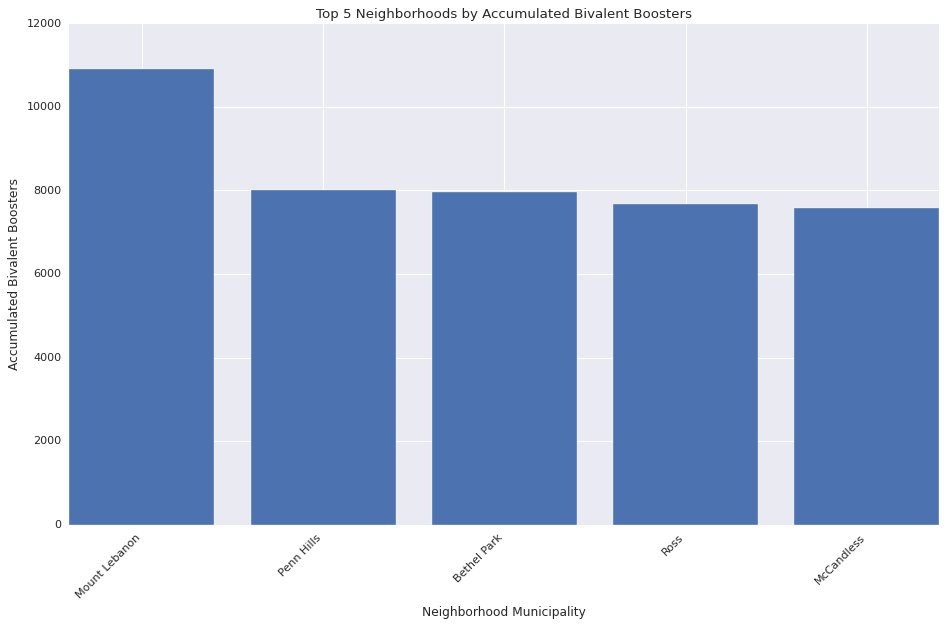

In [43]:
top5_vacs = num_vacs.head(5)

# Plotting the bar graph for the top 5 neighborhoods
plt.figure(figsize=(12, 8))
plt.bar(top5_vacs['neighborhood_municipality'],top5_vacs['bivalent_booster'])
plt.xlabel('Neighborhood Municipality')
plt.ylabel('Accumulated Bivalent Boosters')
plt.title('Top 5 Neighborhoods by Accumulated Bivalent Boosters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot

plt.show()

* Although **Penn Hills** and **Bethel Park** are tied for second place, **Mount Lebanon** still has a large lead of over <ins>3,000</ins> individuals who recieved the bivalent booster.
----

## Cumulative Sum Graph

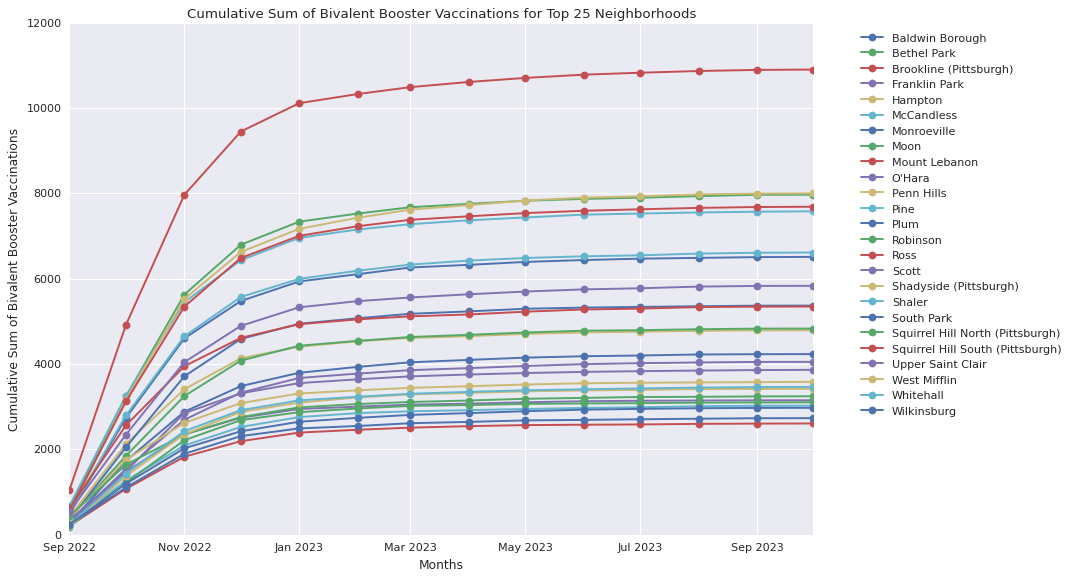

In [44]:
# Convert the 'month' column to datetime format
vacs['month'] = pd.to_datetime(vacs['month'])

# Sort the DataFrame by 'neighborhood_municipality' and 'month'
vacs = vacs.sort_values(by=['neighborhood_municipality', 'month'])

# Create a new DataFrame cumsum_vacs
cumsum_vacs = pd.DataFrame(columns=['months', 'neighborhood_municipality', 'bivalent_booster'])

# Calculate the cumulative sum within each neighborhood
cumsum_vacs['months'] = vacs['month']
cumsum_vacs['neighborhood_municipality'] = vacs['neighborhood_municipality']
cumsum_vacs['bivalent_booster'] = vacs.groupby('neighborhood_municipality')['bivalent_booster'].cumsum()

# Calculate the sum of 'bivalent_booster' for each neighborhood
neighborhood_sums = cumsum_vacs.groupby('neighborhood_municipality')['bivalent_booster'].max()

# Select the top 25 neighborhoods
top_25_neighborhoods = neighborhood_sums.nlargest(25).index

# Filter the DataFrame for the top 25 neighborhoods
cumsum_vacs_top_25 = cumsum_vacs[cumsum_vacs['neighborhood_municipality'].isin(top_25_neighborhoods)]

# Plot the cumulative sum for each neighborhood
plt.figure(figsize=(12, 8))
for neighborhood, group in cumsum_vacs_top_25.groupby('neighborhood_municipality'):
    plt.plot(group['months'], group['bivalent_booster'], label=neighborhood, marker='o', linestyle='-')
    
plt.title('Cumulative Sum of Bivalent Booster Vaccinations for Top 25 Neighborhoods')
plt.xlabel('Months')
plt.ylabel('Cumulative Sum of Bivalent Booster Vaccinations')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

* It can be seen in the accumulative sum graph above how big of a difference there is in the amount of individuals who recieved the bivalent booster from **Mount Lebanon** than any other neighborhood in Pittsburgh. 
____

## Top 5 Most Vaccinated Neighborhood by Population Percentage


Using one last test, I wanted to see which of the calculated top 5 neighborhoods has recieved the most amount of bivalent boosters per the neighborhood's population. This can be calculated with the forumla shown below:

#### Accumulative Sum of People Vaccinated per Neighborhood ÷ Population of Neighborhood = <ins>% of People Vaccinated per Neighborhood</ins>

* There is a slight flaw in this prediction however, as the **[census](www.census.gov)** used for each neighborhood was last updated on 07/2022, while vaccination dataset used is elapsed from 09/2022-09/2023. So although the calculations below may flawed, they give a rough depiction of the percentage of how many individuals recieved the bivalent booster to those who did not in a neighborhood.

##### 1. Mount Lebanon: 10901 / 33218 ≈ 33%
##### 2. Penn Hills: 7999 / 40120 ≈ 20%
##### 3. Bethel Park: 7968 / 32782 ≈ 24%
##### 4. Ross: 7686 / 32819 ≈ 23%
##### 5. McCandless: 7579 / 29038 ≈ 26%

* The calculations above show that **Mount Lebanon** holds the highest percentage of bivalent booster vaccinated individuals in its population. Again, while this data may be slightly inaccurate due to the outdated census, it gives a rough appromximation of which of the top 5 neighborhoods has the highest census percetanage that is vaccinated.

----
## Conclusion

After creating a rough approximaton of which neighborhod has the highest percentage of bivalent booster vaccinated individuals in its population, the standings for which neighborhood is the most vaccinated can be slightly altered to this:

##### 1. **Mount Lebanon:** 10901 → 33% of pop. vaccinated
##### 2. **McCandless:** 7579 → 26% of pop. vaccinated
##### 3. **Bethel Park:** 7968 → 24% of pop. vaccinated
##### 4. **Ross:** 7686 → 23% of pop. vaccinated
##### 5. **Penn Hills:** 7999 20% → of pop. vaccinated

* Standings for this section of the best neighborhood to survive the apocalypse study were based on the calculations done on census percentage. This is done to maximize your chances to encounter other vaccinated survivers, giving you a greater chance to build a strong community of suriviors during the end of the world. 


<br>

In conclusion, it can be seen that through various tests, **Mount Lebanon** takes the title of the most vaccinated neighborhood in Pittsburgh.